# Heart Disease Databases

In [ ]:
## Group Members
* Gary Wu 
* Abner Inder Singh Bal
* Taarika 

##  Index 
 1. Introduction
  * Background Information 
  * Question 
  * Database description 
 2. Attribute Information
 3. Preliminary exploratory data analysis
  * Summarize and visualize
 4. Methods
 5.Expected Outcomes 
  * What do you expect to find? 
  * What impact could such findings have?
  * What future questions could this lead to 

## Introduction

### Background Infromation 
* This database contains 76 attributes, but all published experiments
  refer to using a subset of 14 of them.  In particular, the Cleveland
  database is the only one that has been used by ML researchers to 
  this date. All the attributes contain data that may be related to heart disease  

### Question 
* We will  analyze the predictors to try and predict the value of heart disease(num: values 0 - 4, where 0 means no presence of heart disease)

### Dataset Description

* The Dataset we are using is the cleveland processed data that contains data which is already in a tidy format.   out of the 14 columns we are going to use age , chol , restecg , cp and num .

  


## Attribute Information:
* Only 5 out of  14 columns used
 * Age : age in years     
 * chol: serum cholestoral in mg/dl   
 * restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
 * cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
 * num: num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing 
        -- Value 1: > 50% diameter narrowing


## Preliminary exploratory data analysis

In [40]:
# load libs, read data from web, tidy, split into train/test
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

print("Read Attribute Information for more info about column names")

heart_disease_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
heart_data <- read_csv(heart_disease_url, col_names = col_names) %>% 
                        select(age,chol,restecg,cp ,num) %>%
                        mutate(restecg=as.factor(restecg),cp=as.factor(cp),num=as.factor(num))

df_split <- initial_split(heart_data, prop = 0.75, strata = num)
heart_data_train <- training(df_split)
heart_data_test <- testing(df_split)

head(heart_data_train, 5)

[1] "Read Attribute Information for more info about column names"


Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



age,chol,restecg,cp,num
<dbl>,<dbl>,<fct>,<fct>,<fct>
63,233,2,1,0
67,286,2,4,2
67,229,2,4,1
37,250,0,3,0
41,204,2,2,0


## Summarize and visualize 

[1] "Read Attribute Information for more info about column names"


`summarise()` ungrouping output (override with `.groups` argument)



cp,count
<fct>,<int>
1,18
2,38
3,63
4,110


`summarise()` ungrouping output (override with `.groups` argument)



restecg,count
<fct>,<int>
0,110
1,4
2,115


`summarise()` ungrouping output (override with `.groups` argument)



num,count
<fct>,<int>
0,123
1,42
2,28
3,26
4,10


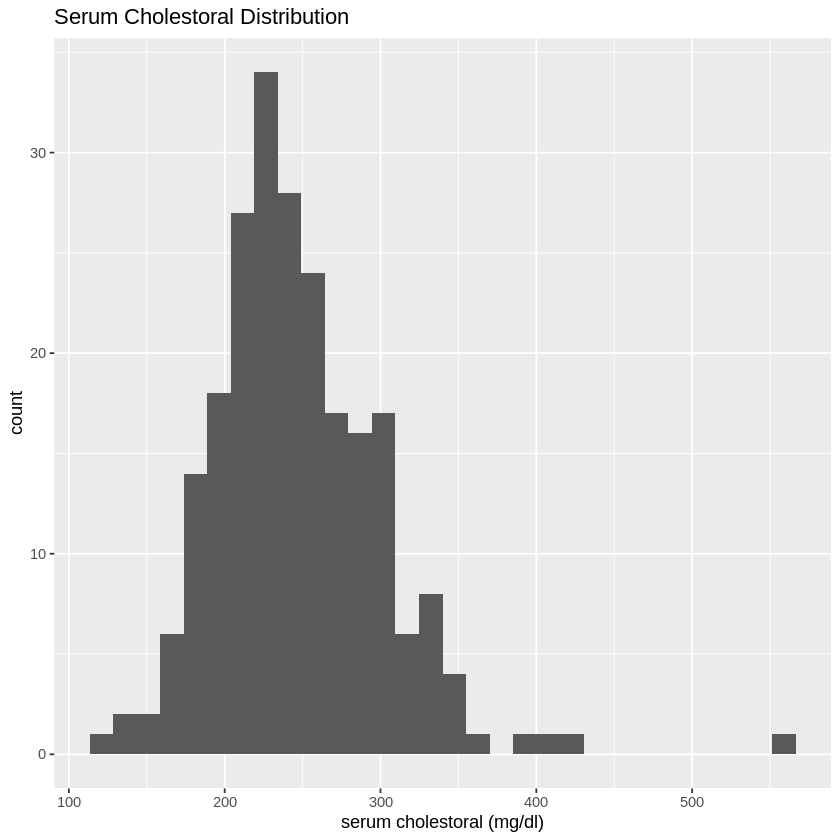

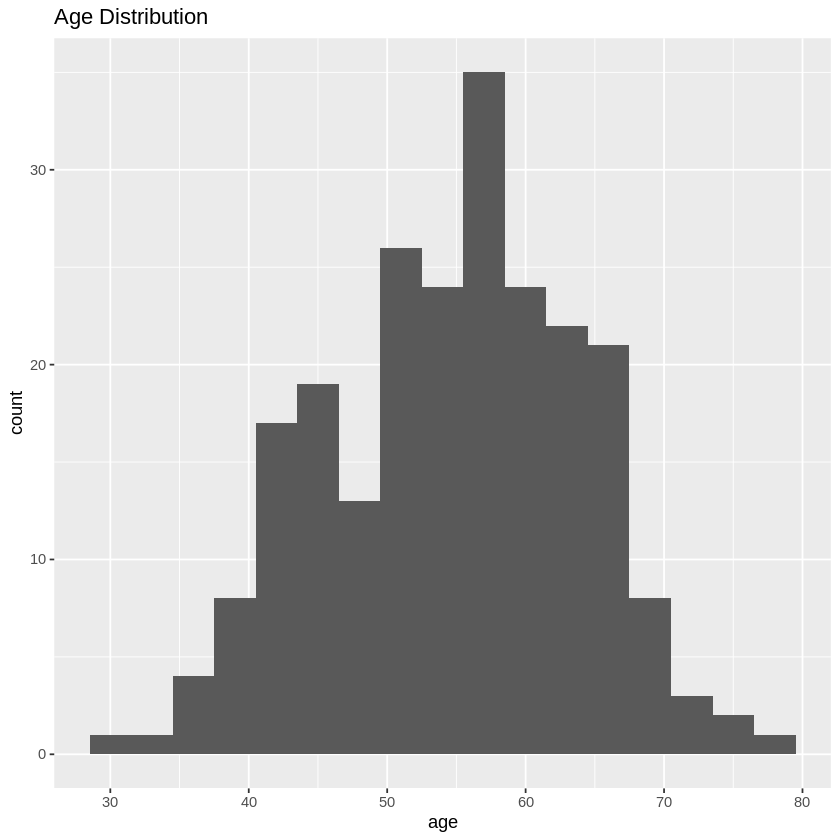

In [41]:
# data summarize
print("Read Attribute Information for more info about column names")
count_cp <- group_by(heart_data_train,cp) %>%
            summarize(count = n())
count_cp

count_restecg <- group_by(heart_data_train,restecg) %>%
            summarize(count = n())
count_restecg  

count_num <- group_by(heart_data_train,num) %>%
            summarize(count = n())
count_num

# data visualize

chol_plot <- ggplot(heart_data_train,  aes(x = chol)) +
    geom_histogram(bins=30) +
    xlab("serum cholestoral (mg/dl)") +
    ggtitle("Serum Cholestoral Distribution")
    
chol_plot

age_plot <- ggplot(heart_data_train,  aes(x = age)) +
    geom_histogram(binwidth = 3) +
    ggtitle("Age Distribution")
    
age_plot

## Methods
* We are going to use age, chol, restecg, cp to predict num (read Attribute Information for more info). We selected these predictors based on visualizing the relationship between some variables and daily knowledge.
* We decided to use color prediction maps to visualize the results. 
* We will Create a k-nn model specification with a recipe and Train the model with the training data to build   the classifier.Then we will use the  testing data and make the predictions.


## Expected Outcomes 
### What do you expect to find?

* We expect to find a relation the predictors(age , chol , restecg , cp )  and num(value of heart disease)

### What impact could such findings have?

* This finding could lead to recognition or diagnoses of heart disease on the bases of the predictors we used

### What future questions could this lead to 

* It could lead to questions such as:
 * Is there a relation between our predictors and num ?
 * What combination of attributes can lead to a more accurate diagnosis of heart disease ?
 * Which attributes we  used in the analysis do not have a relation with num ?
